# PUC-RJ
## MVP - Machine Learning e Analytcs
### Aluno: Eduardo Luiz Matos Baptistone

## Análise de Prdição para Insuficiência Renal

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import requests
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif, f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score, average_precision_score # para a exibição da acurácia do modelo
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 1000)

In [2]:
# Carga do dataset
#df_load = pd.read_csv('F:\\Edu\\PUC\\Cod\\puc_ia\\mvp\\ML_Analytcs\\dataset\\kidney_disease.csv')

# url a importar
url_dados = 'https://raw.githubusercontent.com/ebapp-dev/puc_ia/main/mvp/ML_Analytcs/dataset/kidney_disease.csv'
#urlData = requests.get(url_dados).content
df_load = pd.read_csv(url_dados)

df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
"""
Dicionário de dados:
id - count of the entries in the dataset
age - age
bp - blood pressure
sg - specific gravity
al - albumin
su - sugar
rbc - red blood cells
pc - pus cell
pcc - pus cell clumps
ba - bacteria
bgr - blood glucose random
bu - blood urea
sc - serum creatinine
sod - sodium
pot - potassium
hemo - hemoglobin
pcv - packed cell volume
wc - white blood cell count
rc - red blood cell count
htn - hypertension
dm - diabetes mellitus
cad - coronary artery disease
appet- appetite
pe - pedal edema
ane - anemia
classification - class
"""

'\nDicionário de dados:\nid - count of the entries in the dataset\nage - age\nbp - blood pressure\nsg - specific gravity\nal - albumin\nsu - sugar\nrbc - red blood cells\npc - pus cell\npcc - pus cell clumps\nba - bacteria\nbgr - blood glucose random\nbu - blood urea\nsc - serum creatinine\nsod - sodium\npot - potassium\nhemo - hemoglobin\npcv - packed cell volume\nwc - white blood cell count\nrc - red blood cell count\nhtn - hypertension\ndm - diabetes mellitus\ncad - coronary artery disease\nappet- appetite\npe - pedal edema\nane - anemia\nclassification - class\n'

In [7]:
"""
Aplicar:
- OneHotEncoder
- OrdinalEncoder
"""

'\nAplicar:\n- OneHotEncoder\n- OrdinalEncoder\n'

In [3]:
# Limpeza dos dados

df_clean = df_load.copy(deep=True)

#PCV
df_clean['pcv'] =df_clean['pcv'].replace('?',np.nan)
df_clean['pcv'] = df_clean['pcv'].replace('\t43','43')
df_clean['pcv'] = df_clean['pcv'].replace('\t?',np.nan)

#WC
df_clean['wc'] =df_clean['wc'].replace('?',np.nan)
df_clean['wc'] = df_clean['wc'].replace('\t?',np.nan)
df_clean['wc']

#RC
df_clean['rc'] =df_clean['rc'].replace('?',np.nan)
df_clean['rc'] = df_clean['rc'].replace('\t?',np.nan)
df_clean['rc']

#DM
df_clean['dm'] =df_clean['dm'].replace('\tno','no')
df_clean['dm'] = df_clean['dm'].replace('\tyes','yes')

#CAD
df_clean['cad'] =df_clean['cad'].replace('\tno','no')

#Classification
df_clean['classification'] =df_clean['classification'].replace('ckd\t','ckd')


df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             329 non-null    object 
 17  wc              294 non-null    obj

In [4]:
print(df_clean.shape)
print(df_clean.describe())

(400, 26)
               id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   

In [5]:
df_clean.nunique()

id                400
age                76
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               146
bu                118
sc                 84
sod                34
pot                40
hemo              115
pcv                42
wc                 91
rc                 48
htn                 2
dm                  3
cad                 2
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

In [6]:
# Tratamento dos dados

df_ini = df_clean.copy(deep=True)

# Separação de colunas numericas e categoricas para tratamento
categorical_columns = df_ini.select_dtypes(include=['object']).columns
numerical_columns = df_ini.select_dtypes(include=[np.number]).columns
print(categorical_columns, numerical_columns)

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object') Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo'],
      dtype='object')


In [7]:
def mode_imputation(df, cat_cols):
    for col in cat_cols:
        mode_val = df[col].mode()[0]
        df[col].fillna(mode_val, inplace=True)

def median_imputation(df, num_cols):
    for col in num_cols:
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)

In [8]:
#Ajustar dados faltantes

mode_imputation(df_ini, categorical_columns)
median_imputation(df_ini, numerical_columns)

df_ini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             400 non-null    float64
 2   bp              400 non-null    float64
 3   sg              400 non-null    float64
 4   al              400 non-null    float64
 5   su              400 non-null    float64
 6   rbc             400 non-null    object 
 7   pc              400 non-null    object 
 8   pcc             400 non-null    object 
 9   ba              400 non-null    object 
 10  bgr             400 non-null    float64
 11  bu              400 non-null    float64
 12  sc              400 non-null    float64
 13  sod             400 non-null    float64
 14  pot             400 non-null    float64
 15  hemo            400 non-null    float64
 16  pcv             400 non-null    object 
 17  wc              400 non-null    obj

In [9]:
# Ordinal encoder nas features não numericas

oe = OrdinalEncoder()
df_ini['rbc'] = oe.fit_transform(df_ini.rbc.values.reshape(-1,1))
df_ini['pc'] = oe.fit_transform(df_ini.pc.values.reshape(-1,1))
df_ini['pcc'] = oe.fit_transform(df_ini.pcc.values.reshape(-1,1))
df_ini['ba'] = oe.fit_transform(df_ini.ba.values.reshape(-1,1))
df_ini['htn'] = oe.fit_transform(df_ini.htn.values.reshape(-1,1))
df_ini['dm'] = oe.fit_transform(df_ini.dm.values.reshape(-1,1))
df_ini['cad'] = oe.fit_transform(df_ini.cad.values.reshape(-1,1))
df_ini['pe'] = oe.fit_transform(df_ini.pe.values.reshape(-1,1))
df_ini['ane'] = oe.fit_transform(df_ini.ane.values.reshape(-1,1))

oe.categories_ = ['poor','good']
df_ini['appet'] = oe.fit_transform(df_ini.appet.values.reshape(-1,1))
oe.categories_ = ['notckd','ckd']
df_ini['class'] = oe.fit_transform(df_ini.classification.values.reshape(-1,1))
df_ini = df_ini.drop(['classification'],axis=1)
df_ini = df_ini.drop(['id'],axis=1)

# Transformar features numéricas em tipos corretos
df_ini['pcv'] = df_ini['pcv'].astype(str).astype(int)
df_ini['wc'] = df_ini['wc'].astype(str).astype(int)
df_ini['rc'] = df_ini['rc'].astype(str).astype(float)


df_ini.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    float64
 3   al      400 non-null    float64
 4   su      400 non-null    float64
 5   rbc     400 non-null    float64
 6   pc      400 non-null    float64
 7   pcc     400 non-null    float64
 8   ba      400 non-null    float64
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    int32  
 16  wc      400 non-null    int32  
 17  rc      400 non-null    float64
 18  htn     400 non-null    float64
 19  dm      400 non-null    float64
 20  cad     400 non-null    float64
 21  appet   400 non-null    float64
 22  pe

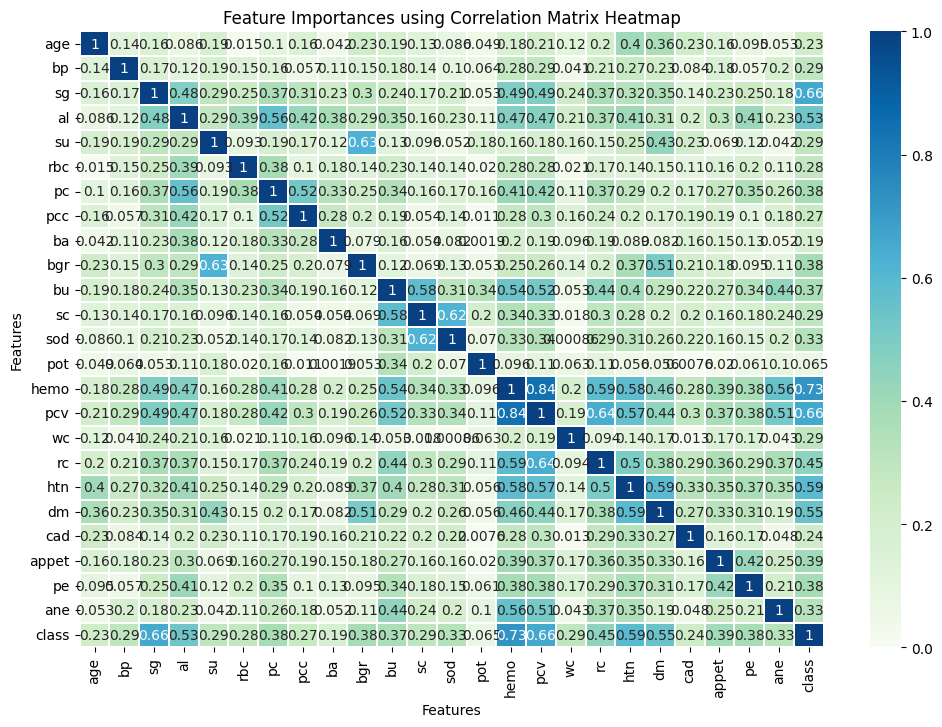

In [10]:
# Create a correlation matrix
corr_matrix = df_ini.corr().abs() # Com abs para agrupara os atributos que influenciam positamente e negativamente.

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='GnBu', linewidths=0.2, vmin=0, vmax=1)
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Feature Importances using Correlation Matrix Heatmap')
plt.show()

<Axes: >

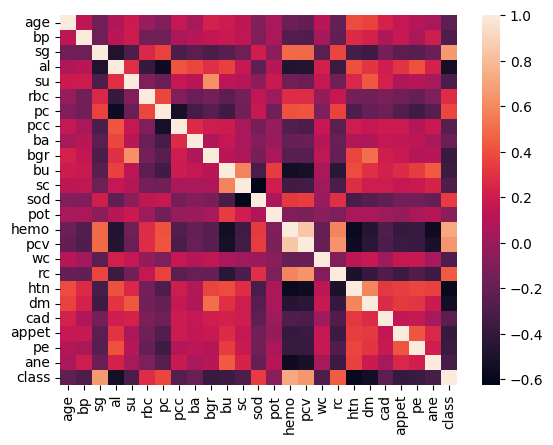

In [11]:
sns.heatmap(df_ini.corr())

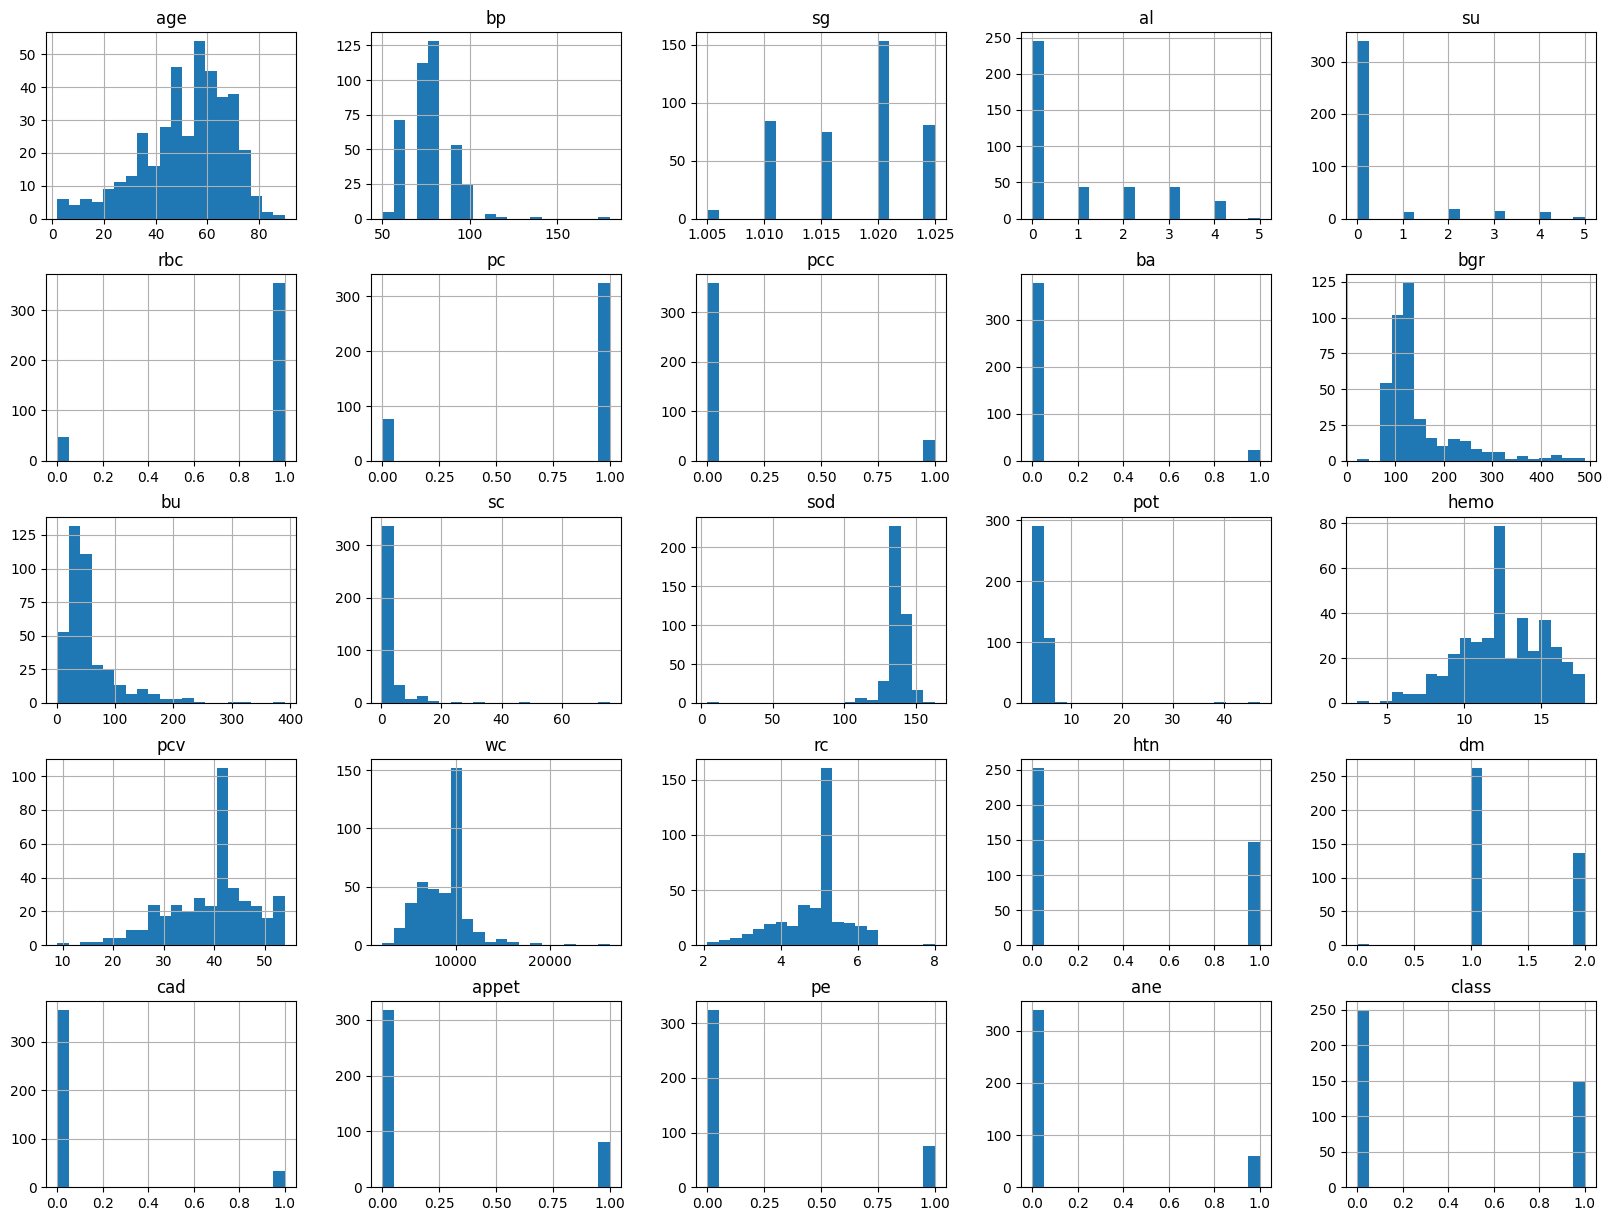

In [12]:
df_ini.hist(bins=20, figsize=(20,15))
plt.show()

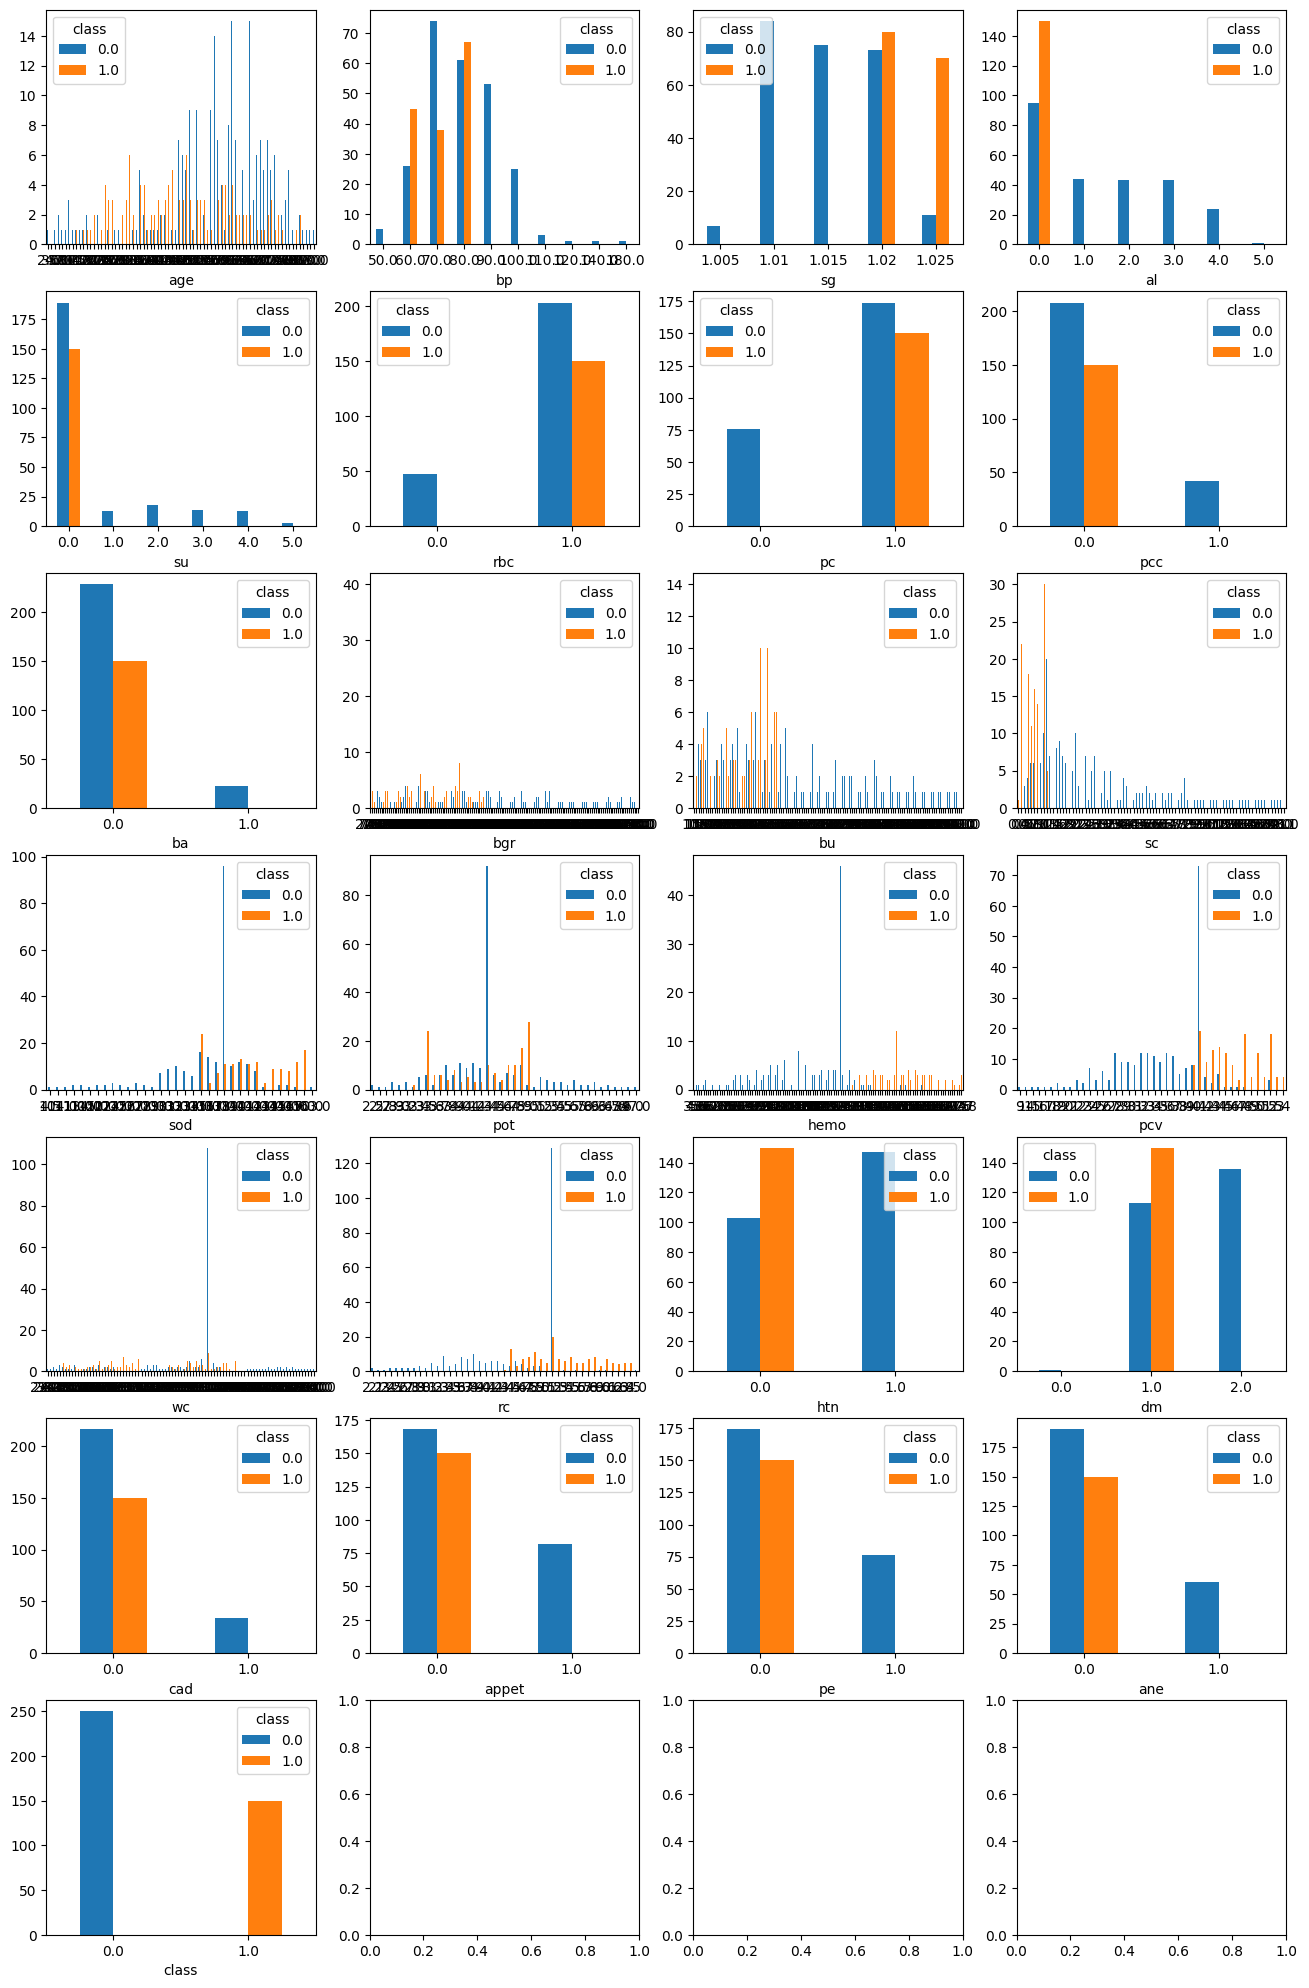

In [51]:
#Gráficos de atributos por class
fig, axs=plt.subplots(7,4,figsize=(16,25))
lin=0
col=0 
for c in df_ini.columns:
    nax = 500+(lin*10)+(col)
    ax = axs[lin,col]
    crosstb = pd.crosstab(df_ini[c], df_ini['class'], dropna=False)
    crosstb.plot.bar(rot=0, ax=ax)
    col += 1
    if col == 4:
        lin += 1
        col = 0
plt.show()


In [14]:
corr_matrix = df_ini.corr()
corr_matrix["class"].sort_values(ascending=False)

class    1.000000
hemo     0.726368
sg       0.659504
pcv      0.656471
rc       0.446612
pc       0.375154
sod      0.334900
rbc      0.282642
pot     -0.065218
ba      -0.186871
age     -0.227842
cad     -0.236088
pcc     -0.265313
wc      -0.290293
sc      -0.291245
bp      -0.293693
su      -0.294555
ane     -0.325396
bu      -0.369393
pe      -0.375154
bgr     -0.379321
appet   -0.393341
al      -0.531562
dm      -0.546786
htn     -0.590438
Name: class, dtype: float64

<Axes: >

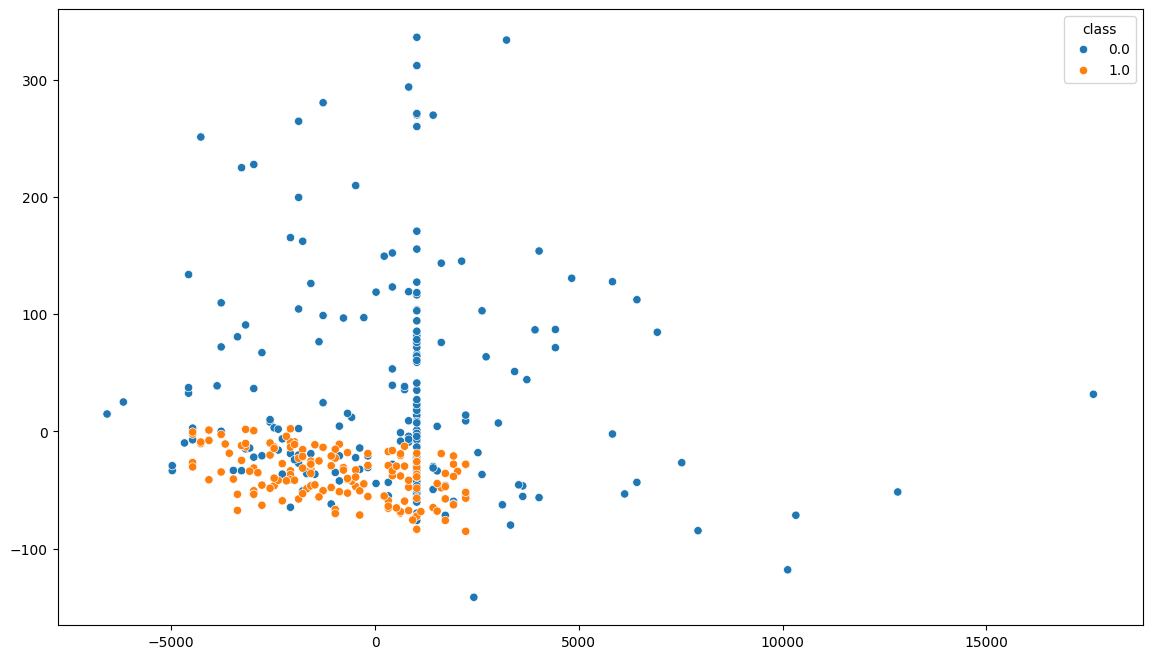

In [16]:
from sklearn.decomposition import PCA 
import seaborn as sns

pca = PCA(n_components = 2,power_iteration_normalizer='QR')
df_simpl = pca.fit_transform(df_ini)
plt.figure(figsize=(14, 8))
sns.scatterplot(x = df_simpl[:,0], y = df_simpl[:,1], hue = df_ini['class'], palette='tab10')

In [17]:
# Preparação dos dados

# Separação de dados de atributos e classe para seleção de melhores atributos
array = df_ini.values
X = array[:,0:24] # atributos
y = array[:,24] # classe (target)

print(X)

[[48.    80.     1.02  ...  0.     0.     0.   ]
 [ 7.    50.     1.02  ...  0.     0.     0.   ]
 [62.    80.     1.01  ...  1.     0.     1.   ]
 ...
 [12.    80.     1.02  ...  0.     0.     0.   ]
 [17.    60.     1.025 ...  0.     0.     0.   ]
 [58.    80.     1.025 ...  0.     0.     0.   ]]


In [18]:
# Padronização (treino)
ss = StandardScaler() #standardization
X = ss.fit_transform(X)

print(X)

[[-0.21003135  0.25421378  0.4214856  ... -0.50780078 -0.4843221
  -0.42008403]
 [-2.62723421 -1.97247624  0.4214856  ... -0.50780078 -0.4843221
  -0.42008403]
 [ 0.615355    0.25421378 -1.4210744  ...  1.96927621 -0.4843221
   2.38047614]
 ...
 [-2.33245337  0.25421378  0.4214856  ... -0.50780078 -0.4843221
  -0.42008403]
 [-2.03767254 -1.23024623  1.3427656  ... -0.50780078 -0.4843221
  -0.42008403]
 [ 0.37953033  0.25421378  1.3427656  ... -0.50780078 -0.4843221
  -0.42008403]]


In [19]:
# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=mutual_info_classif , k=12)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

cols = df_ini.columns[0:24]

best_attributes = best_var.get_feature_names_out(input_features=cols)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", cols)

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=cols))


Número original de atributos: 24

Número reduzido de atributos: 12

Atributos Originais: Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane'],
      dtype='object')

Scores dos Atributos Originais: [0.045 0.143 0.332 0.213 0.067 0.047 0.1   0.054 0.008 0.151 0.169 0.366
 0.235 0.214 0.448 0.377 0.136 0.343 0.246 0.184 0.033 0.113 0.1   0.097]

Atributos Selecionados: ['sg' 'al' 'bgr' 'bu' 'sc' 'sod' 'pot' 'hemo' 'pcv' 'rc' 'htn' 'dm']


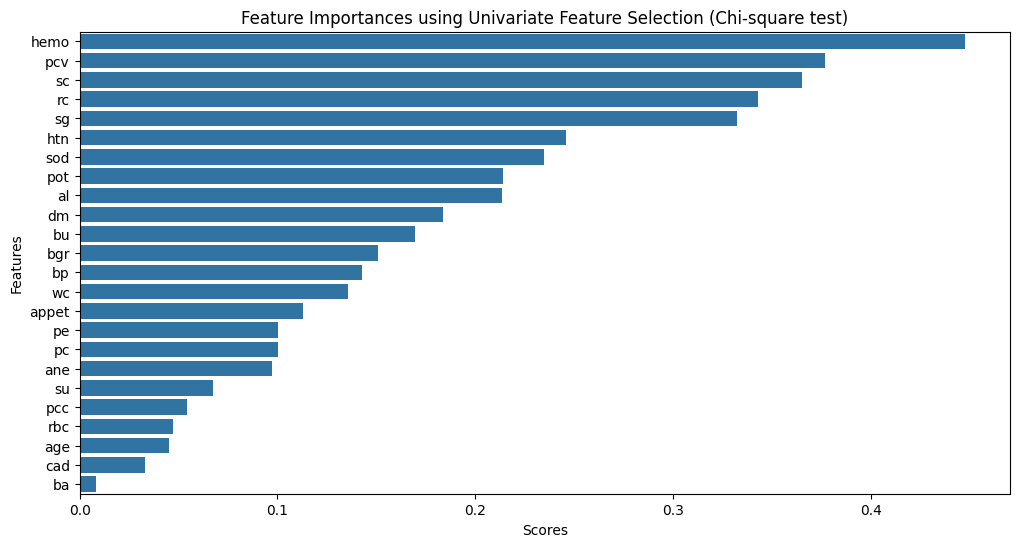

In [20]:
# get the scores and selected features
scores = fit.scores_
selected_features = cols

sorted_idxs = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_idxs]
sorted_feature_names = np.array(df_ini.columns)[sorted_idxs]

# plot scores
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_scores, y=sorted_feature_names)
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importances using Univariate Feature Selection (Chi-square test)')
plt.show()

In [21]:
# Dados com atributos selecionados
attributes = np.append(best_attributes,['class'])
df_sel = df_ini[attributes]
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sg      400 non-null    float64
 1   al      400 non-null    float64
 2   bgr     400 non-null    float64
 3   bu      400 non-null    float64
 4   sc      400 non-null    float64
 5   sod     400 non-null    float64
 6   pot     400 non-null    float64
 7   hemo    400 non-null    float64
 8   pcv     400 non-null    int32  
 9   rc      400 non-null    float64
 10  htn     400 non-null    float64
 11  dm      400 non-null    float64
 12  class   400 non-null    float64
dtypes: float64(12), int32(1)
memory usage: 39.2 KB


In [22]:
# Separação de treino e teste

df_model = df_sel.copy(deep=True)
#df_model = df_ini.copy(deep=True)

X=df_model.drop('class',axis=1)
print(X.head(5))
y=df_model['class']
print(y.head(5))

X_train, X_test ,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

display(X_train.shape,y_train.shape)


      sg   al    bgr    bu   sc    sod  pot  hemo  pcv   rc  htn   dm
0  1.020  1.0  121.0  36.0  1.2  138.0  4.4  15.4   44  5.2  1.0  2.0
1  1.020  4.0  121.0  18.0  0.8  138.0  4.4  11.3   38  5.2  0.0  1.0
2  1.010  2.0  423.0  53.0  1.8  138.0  4.4   9.6   31  5.2  0.0  2.0
3  1.005  4.0  117.0  56.0  3.8  111.0  2.5  11.2   32  3.9  1.0  1.0
4  1.010  2.0  106.0  26.0  1.4  138.0  4.4  11.6   35  4.6  0.0  1.0
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64


(280, 12)

(280,)

Bagging: 0.971429 (0.014286)
decsion: 0.950000 (0.030723)
logistic: 0.975000 (0.024223)
XGB: 0.950000 (0.030723)
KNN: 0.900000 (0.036770)
NB: 0.942857 (0.048445)
SVM: 0.796429 (0.069253)
RFC: 0.985714 (0.013363)
GBC: 0.971429 (0.008748)
Voting: 0.978571 (0.020825)
[LightGBM] [Info] Number of positive: 83, number of negative: 141
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 322
[LightGBM] [Info] Number of data points in the train set: 224, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.370536 -> initscore=-0.529919
[LightGBM] [Info] Start training from score -0.529919
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

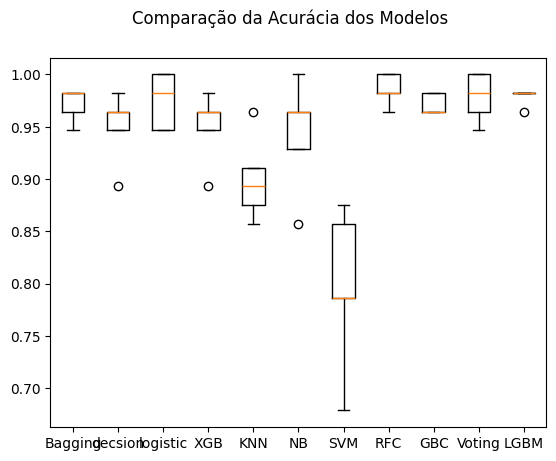

In [23]:
# Modelagem

# Criando os folds para a validação cruzada
num_particoes = 5 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=42)

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
#model1 = RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=5, min_samples_split=5)
bases.append(('logistic', model1))
model2 = RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=5, min_samples_split=5)
#model2 = GradientBoostingClassifier(n_estimators=300,max_depth=4,learning_rate=0.1,subsample=1.0)
bases.append(('RFC', model2))
model3 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bases.append(('XGB', model3))

# Definindo uma seed global para esta célula de código
np.random.seed(7) 

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('decsion',DecisionTreeClassifier()))
models.append(('logistic',LogisticRegression(max_iter=200)))
models.append(('XGB',XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RFC',RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=5, min_samples_split=5)))
models.append(('GBC', GradientBoostingClassifier(n_estimators=300,max_depth=4,learning_rate=0.1,subsample=1.0)))
models.append(('Voting', VotingClassifier(bases)))
models.append(('LGBM',LGBMClassifier()))


# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure() 
fig.suptitle('Comparação da Acurácia dos Modelos') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [24]:
# Criando um modelo com todo o conjunto de treino
#model = BaggingClassifier(estimator=base, n_estimators=num_trees)
#model = KNeighborsClassifier()
model = RandomForestClassifier(n_estimators=300, criterion="gini", max_depth=5, min_samples_split=5)
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test) 

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

0.9916666666666667


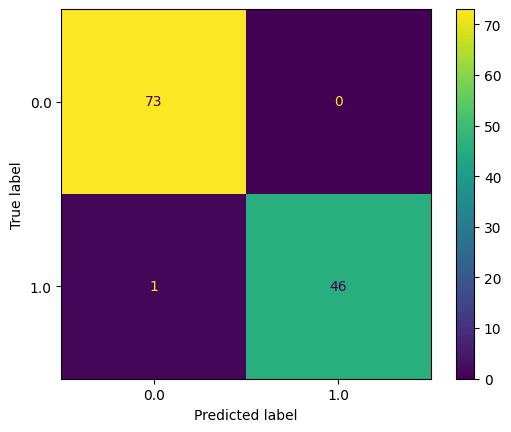

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()